In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

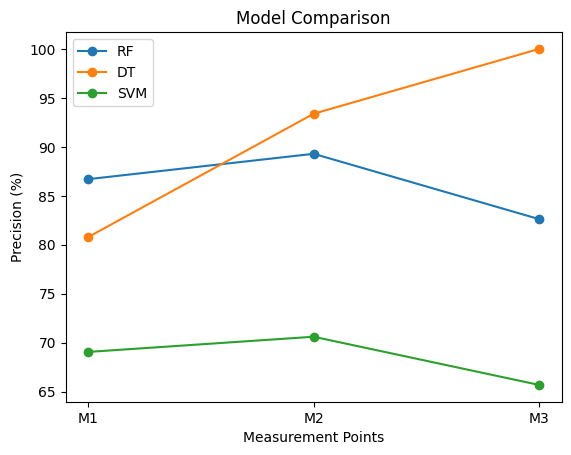

In [16]:


# Assuming you have stored the precision of each model in separate lists
rf_precisions = [86.7, 89.29, 82.62]  # Random Forest
dt_precisions = [80.79, 93.38, 100.00]  # Decision Tree
svm_precisions = [69.06, 70.61, 65.69]  # Support Vector Machine

# The measurement points
categories = ['M1', 'M2', 'M3']

# Create a new figure
plt.figure()

# Plot the precision for each model
plt.plot(categories, rf_precisions, marker='o', label='RF')
plt.plot(categories, dt_precisions, marker='o', label='DT')
plt.plot(categories, svm_precisions, marker='o', label='SVM')

# Add labels and title
plt.xlabel('Measurement Points')
plt.ylabel('Precision (%)')
plt.title('Model Comparison')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [14]:
# Read Files
df = pd.read_excel('data.xlsx')

df.head()

# Separate the features (X) and target variable (y)
X = df.drop('DroppedOut', axis=1)
y = df['DroppedOut']
# Convert numpy arrays
y = np.array(y)
X_predictors = np.array(X)


In [15]:
# Lists to store the metrics of each fold
confusion_matrices = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Perform stratified K-fold cross-validation with 8 folds
skf = StratifiedKFold(n_splits=8)

# Train a Decision Tree classifier on each fold
dt = DecisionTreeClassifier()

for train_index, test_index in skf.split(X_normalized, y):
    X_train, X_test = X_normalized[train_index], X_normalized[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the Decision Tree classifier
    dt.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = dt.predict(X_test)
    
    # Compute the confusion matrix and store it in the list
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
    
    # Compute the metrics and store them in the lists
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='weighted'))
    recalls.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

# Print the confusion matrices
for i, cm in enumerate(confusion_matrices):
    print(f"Confusion matrix for fold {i+1}:\n", cm)
    
# Compute the macro averages
macro_precision = precision_score(y_test, y_pred, average='macro')
macro_recall = recall_score(y_test, y_pred, average='macro')
macro_f1 = f1_score(y_test, y_pred, average='macro')

# Print the metrics
print("Model Accuracy:", np.mean(accuracies))
print("Weighted Average Precision:", np.mean(precisions))
print("Weighted Average Recall:", np.mean(recalls))
print("Weighted Average F1-score:", np.mean(f1_scores))
print("Macro Average Precision:", macro_precision)
print("Macro Average Recall:", macro_recall)
print("Macro Average F1-score:", macro_f1)

Confusion matrix for fold 1:
 [[168  22]
 [ 31  48]]
Confusion matrix for fold 2:
 [[170  20]
 [ 20  59]]
Confusion matrix for fold 3:
 [[174  16]
 [ 11  68]]
Confusion matrix for fold 4:
 [[171  19]
 [ 23  56]]
Confusion matrix for fold 5:
 [[167  24]
 [ 12  66]]
Confusion matrix for fold 6:
 [[159  32]
 [ 15  63]]
Confusion matrix for fold 7:
 [[164  26]
 [ 18  60]]
Confusion matrix for fold 8:
 [[146  44]
 [ 18  60]]
Model Accuracy: 0.8367121178494147
Weighted Average Precision: 0.8437548462482951
Weighted Average Recall: 0.8367121178494147
Weighted Average F1-score: 0.8383843108693734
Macro Average Precision: 0.7335834896810507
Macro Average Recall: 0.7688259109311741
Macro Average F1-score: 0.7420997082014031


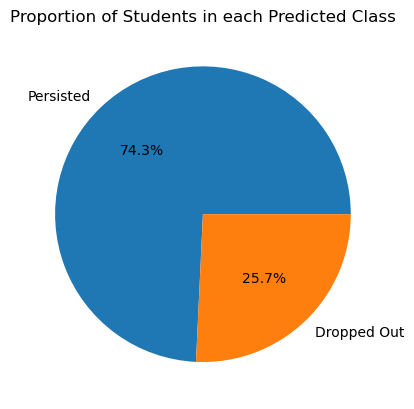

In [5]:
import matplotlib.pyplot as plt

# Count the number of students in each class
class_counts = df['DroppedOut'].value_counts()

# Change the class labels
class_counts.index = ['Persisted', 'Dropped Out']

# Create a pie chart of the counts
class_counts.plot(kind='pie', autopct='%1.1f%%')

plt.title('Proportion of Students in each Predicted Class')
plt.ylabel('')  # This line removes the y-axis label for the pie chart

# Save the figure
plt.savefig('pie_chart.png', bbox_inches='tight')

plt.show()


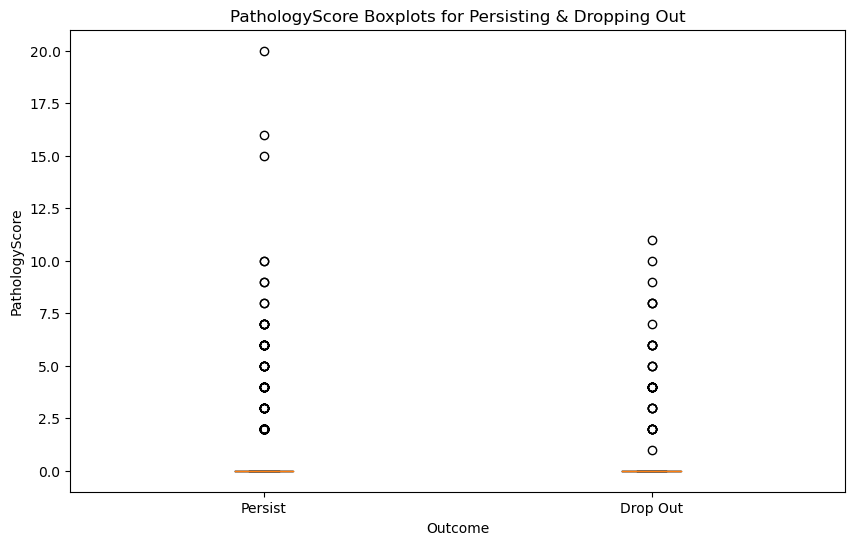

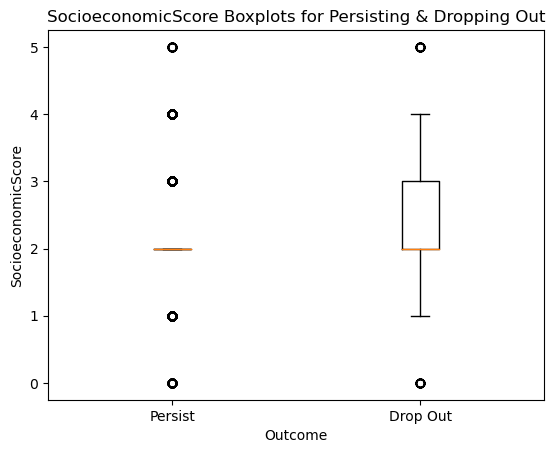

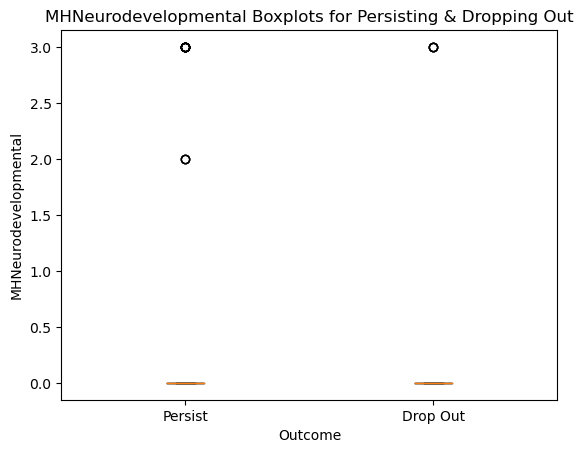

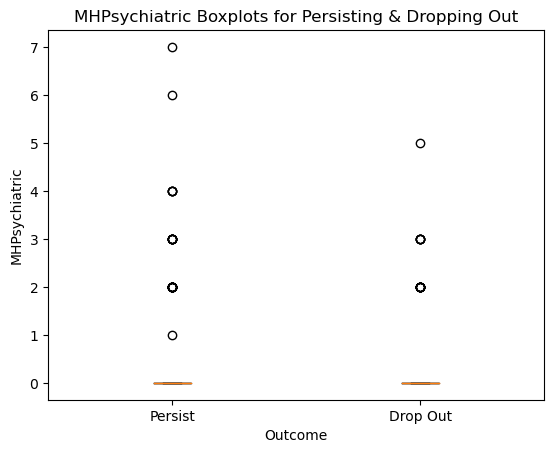

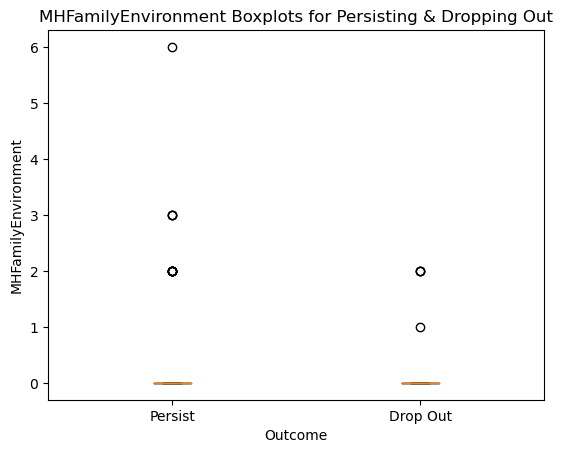

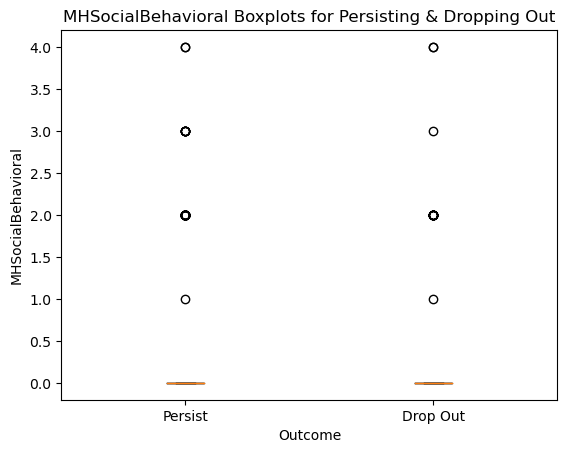

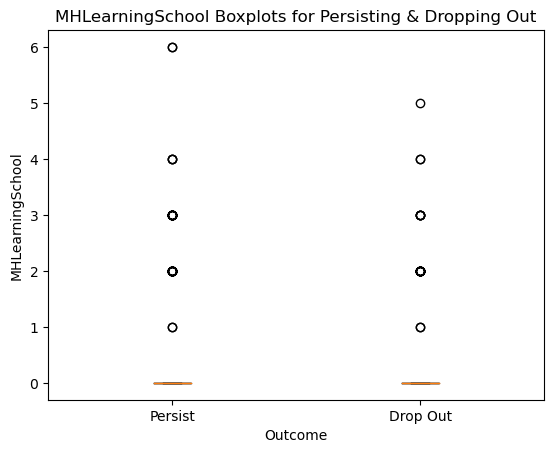

In [248]:
significant_features = ['PathologyScore', 'SocioeconomicScore', 'MHNeurodevelopmental', 'MHPsychiatric', 'MHFamilyEnvironment', 'MHSocialBehavioral', 'MHLearningSchool']

# Create boxplots of the significant features for each class
plt.figure(figsize=(10, 6))
for feature in significant_features:
    plt.boxplot([X.loc[y == 0, feature], X.loc[y == 1, feature]], labels=['Persist', 'Drop Out'])
    plt.xlabel('Outcome')
    plt.ylabel(feature)
    plt.title(f'{feature} Boxplots for Persisting & Dropping Out')
    plt.show()

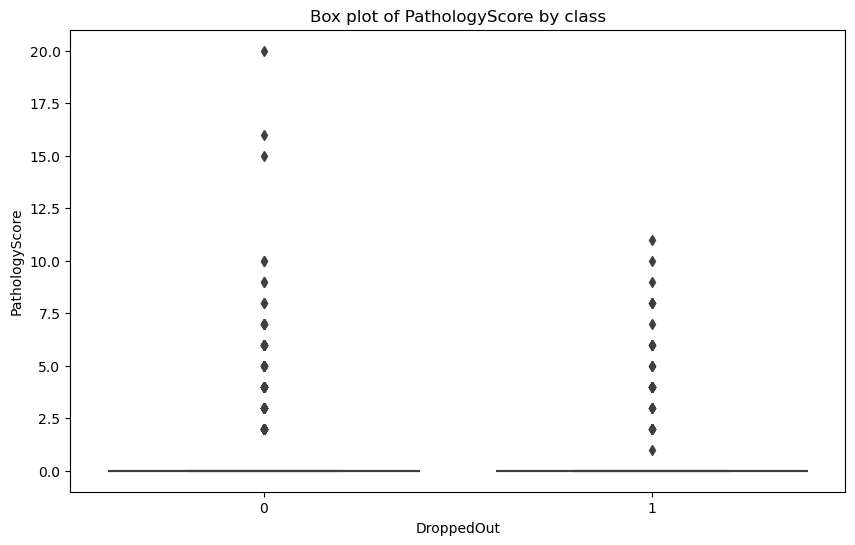

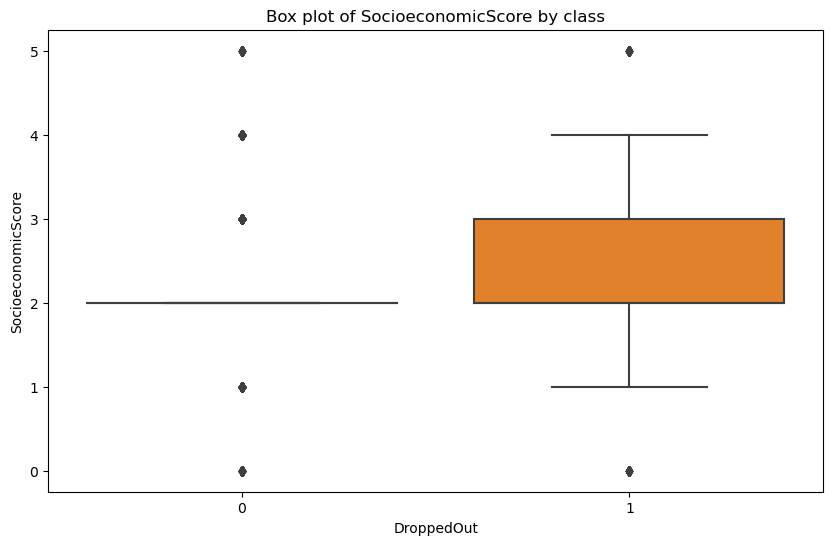

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to plot
features = ['PathologyScore', 'SocioeconomicScore']  # replace with your features

# For each feature, we create a separate box plot for each class
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='DroppedOut', y=feature, data=df)
    plt.title('Box plot of {} by class'.format(feature))
    plt.show()